# Basic Statistics

## Data

In statistics, a **variable** is an attribute of an object of study, also called **cases**.

Data is generally divided into two categories, **quantitative data** and **categorical data**.

**Categorical variables** represent **groupings** (sometimes as numbers). There are three types of categorical variables: **binary**, **nominal**, and **ordinal** variables.

* **Binary variables** represent Yes/No values, e.g. heads/tails in a coin flip.
* **Nominal variables** are groups with no rank or order, e.g. colors, species names.
* **Ordinal variables** are groups that are ranked in a specific order, e.g. scaled responses in a survey, finishing place in a race.


**Quantitative variables** represents **amounts** that can be added, subtracted, divided, etc. There are two types of quantitative variables, **discrete** and **continuous**.

* **Discrete Variables** are counts of individual items or values, e.g. number of students in a class or number of different tree species in a forest.
* **Continuous variables** (aka **ratio variables**) are measurements of continuous values, e.g. age, height or distance.

## Levels of Measurement

Levels of measurement tell you **how precisely variables are recorded**:

* **Nominal**: the data can only be categorized
* **Ordinal**: the data can be categorized and ranked
* **Interval**: the data can be categorized, ranked, and evenly spaced
* **Ratio**: the data can be categorized, ranked, evenly spaced, and has a natural zero.

## Data Matrix

A data matrix is the source of your statistical analysis: **rows** represent the **cases**, the objects of interest and **columns** represet the **variables**, the attributes of your objects. The values are called **observations**.

### Example Data

In this example our **cases** are persons and our **variables** are height (interval data), weight (interval data), age (interval data) and gender (nominal data).

In [44]:
import pandas as pd
import numpy as np
np.random.seed(0) 
import matplotlib.pyplot as plt
import seaborn as sns

n = 100

var_height = 10 ** 2                  # variance of 'height'
mean_height = 170

var_weight = 8 ** 2                   # variance of 'weight'
mean_weight = 85

cov = 72                              # covaraince between 'height' and 'weight'

cov_matrix = [[var_height, cov],
              [cov, var_weight]]

df = pd.DataFrame(np.round(np.random.multivariate_normal([mean_height, mean_weight], cov_matrix, n), decimals=1), columns=['height', 'weight'])

df['age'] = np.random.randint(20, 31, n)                                          # discrete uniform distribution
df['gender'] = ['M' if x == 0 else 'F' for x in np.random.randint(0, 2, n)]       # discrete uniform distribution

df

,height,weight,age,gender
0,151.9,72.3,23,M
1,156.5,82.4,30,M
2,153.3,68.5,21,M
3,160.9,77.4,30,F
4,170.3,86.7,29,F
...,...,...,...,...
95,182.3,95.5,22,F
96,172.4,82.7,29,M
97,165.1,80.6,28,M
98,161.0,80.9,21,F


## Descriptive Statistics

If you want to present your analyses to other people, you make use of **summaries** of your data.

### Frequency Tables

Frequency tables show how data is **distributed** over the cases.

For **categorial data** this is done by summing up observations with the same value:

In [3]:
s = pd.crosstab(index=df['gender'], columns='observations')
s['percent'] = np.round(s / s.sum(), decimals=2)
s

col_0,observations,percent
gender,,
F,56,0.56
M,44,0.44


**Quantitative data** can be encoded to **categorial data** (with a lost of information).

In [4]:
df['height_bins'] = pd.cut(x=df['height'], bins=[130, 139, 149, 159, 169, 179, 189, 199])
df['weight_bins'] = pd.cut(x=df['weight'], bins=[50, 59, 69, 79, 89, 99, 109])

h = pd.crosstab(index=df['height_bins'], columns='observations')
h['percent'] = np.round(h / h.sum(), decimals=2)
h

col_0,observations,percent
height_bins,,
"(139, 149]",3,0.03
"(149, 159]",12,0.12
"(159, 169]",33,0.33
"(169, 179]",32,0.32
"(179, 189]",19,0.19
"(189, 199]",1,0.01


In [5]:
df

,height,weight,age,gender,height_bins,weight_bins
0,151.9,72.3,23,M,"(149, 159]","(69, 79]"
1,156.5,82.4,30,M,"(149, 159]","(79, 89]"
2,153.3,68.5,21,M,"(149, 159]","(59, 69]"
3,160.9,77.4,30,F,"(159, 169]","(69, 79]"
4,170.3,86.7,29,F,"(169, 179]","(79, 89]"
...,...,...,...,...,...,...
95,182.3,95.5,22,F,"(179, 189]","(89, 99]"
96,172.4,82.7,29,M,"(169, 179]","(79, 89]"
97,165.1,80.6,28,M,"(159, 169]","(79, 89]"
98,161.0,80.9,21,F,"(159, 169]","(79, 89]"


### Categorial Data

Using a **pie chart**, one can immediatelly see **percentage**. Using a **bar chart**, one can easily retrieve **exact numbers**. A bar chart has advantanges in favor of a pie chart if the nuber of categories increases.

The **center of a distribution** can be described by the **mode**. Teh mode is the value which appears **most frequently** (can immediatelly been seen using a pie-chart). There can be multiple modes.

In [6]:
df.mode()

,height,weight,age,gender,height_bins,weight_bins
0,160.9,87.5,21,F,"(159.0, 169.0]","(79.0, 89.0]"
1,177.1,NaN,24,NaN,NaN,NaN


### Quantitative Data

For a small sample, use a **dotplot**, for many observations, use a **histogram**.

The **center of a distribution** can be described by the **median** or the **mean**. 

#### Median

The median is the middle value of your observations when they are ordered from the smallest to the largest. Use the median if you have outliers. 

In [7]:
df.median()

height    170.1
weight     85.9
age        25.0
dtype: float64

#### Mean

The **mean** $\mu$ or $\overline{x}$ is the sum of all the values divided by the number of observation ${x_1, x_2, ..., x_N}$ (sample size):

$$\mu = \overline{x} = \frac{1}{N}\displaystyle\sum_{i=1}^{N} x_i$$

In [8]:
df.mean()

height    169.771
weight     85.321
age        24.990
dtype: float64

#### Standard Deviation

The **variance** is 

$$\text{var}(X)= s = \frac{1}{n-1}\displaystyle\sum_{i=1}^{n} \left( x_i - \overline{x} \right)^2$$

and the **standard deviation** $\sigma$ is 

$$\sigma = \sqrt{s}$$

The differences of the mean from the actual values are squared to prevent positive and negative deviations from neutralizing each other. As a result, the unit of the **variance** is squared which may result in a bad interpretation, e.g. the variance of a length is an area. Therefore we use the square-root of the variance as **standard variation** in order to have correct dimensions.

In [9]:
df.var()

height    104.652181
weight     68.293595
age         9.747374
dtype: float64

In [10]:
df.std()

height    10.229965
weight     8.263994
age        3.122078
dtype: float64

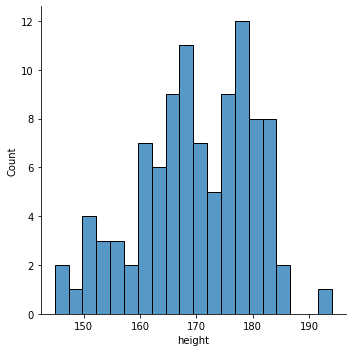

In [11]:
sns.displot(df.height, bins=20);

#### Standardization with z-Score

In order to find out if a **specific observation** is **common** or **exceptional**, we calculate the **z-score** or **standard score**:

$$z = \frac{x-\mu}{\sigma}$$

The **relative deviation** is normalized to the standard deviation with $\mu = 0$ and $\sigma = 1$.

If the histogram of your variable is bell shaped, then

* **68%** of the observations fall between z-scores **-1** and **1**
* **95%** between z-scores of **-2** and **2**
* **99%** between z-scores of **-3** and **3**

This means that for a bell shaped distribution, **a z-score of more than 3 or less than -3** can be conceived of as rather **exceptional**.

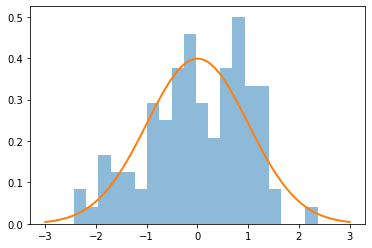

In [12]:
from scipy.stats import norm

mu = df.height.mean()
sigma = df.height.std()
z = (df.height - mu) / sigma
plt.hist(z, bins=20, alpha=0.5, density=True)

x = np.linspace(-3, 3, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, linewidth=2);

A rule that applies to any distribution regardless of its shape shape, is that 

* **75%** of the data must lie within a z-score of **±2**
* **89%** within a z-score of **±3**.

So in itself a z-score gives you, to a certain extent, information about how extreme an observation is.

#### Interquartile Range

The **variability of a distribution** can be described by the **range**. The range is the difference between the highest and the lowest value. 

More feasible for describing the variability is the **interquartile range**, as it leaves out the extreme values. the interquartile range divides your distribution into **four equal parts**. The three dividers are called first quartile $\text{Q1}$, second quartile $\text{Q2}$ and third quartile $\text{Q3}$. 

The **second quartile** $\text{Q2}$is the same as the **median** of your sample.

The **interquartile range** $\text{IQR} = \text{Q3} - \text{Q1}$ is not affected by outliers.

As a rule of thumb, observations can be qualified as **outliers** if

$$x_{LO} < \text{Q1} - 1.5 \cdot \text{IQR} \quad \text{or} \quad x_{RO} > \text{Q3} + 1.5 \cdot \text{IQR}$$

#### Box Plot

The box plot is very useful for describing center and variability, and detecting outliers.

The box plot shows you at a glance

* the **maximum** value that is not an outlier, 
* $\text{Q3}$,
* $\text{Q2}$ or the **mean**,
* $\text{Q1}$,
* the **minimum** value that is not an outlier,
* the **outliers**

In [13]:
df.height.describe()

count    100.000000
mean     169.771000
std       10.229965
min      144.900000
25%      162.675000
50%      170.100000
75%      178.200000
max      194.000000
Name: height, dtype: float64

In [14]:
# filter outliers in a data series
h = df.height
iqr = h.quantile(0.75) + h.quantile(0.25)
lo = h.quantile(0.25) - 1.5 * iqr
ro = h.quantile(0.75) + 1.5 * iqr


h_without_outliers = h[(h > lo) & (h < ro)]
h_outliers = h[(h <= lo) | (h >= ro)]
h_outliers

Series([], Name: height, dtype: float64)

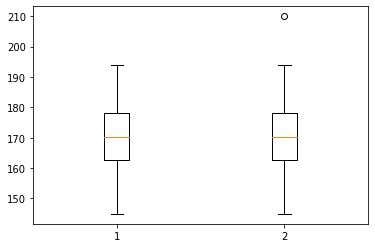

In [23]:
heights = df.height.append(pd.Series([210], index=[100]))      # add a artifical outlier
plt.boxplot([df.height, heights]);

The length of the box represents the $\text{IQR}$. The horizontal line inside the box is the median or in other words, $\text{Q2}$.

## Correlation and Regression

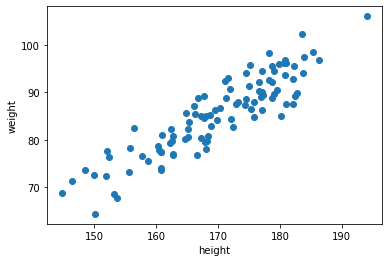

In [63]:
plt.scatter(df['height'], df['weight'])
plt.xlabel('height')
plt.ylabel('weight');

### Covariance

The **sample covariance** is a measure of the joint variability of **two random variables** $x$ and $y$:

$$
\text{cov}(X,Y) = \frac{1}{n-1} \sum{(x-\hat{x})(y-\hat{y})}
$$

The covariance is **positive** if the variables tend to show **similar linear behavior**. The covariance is **negative** if the variables tend to show **opposite linear behavior**. The covaraince is **zero** if there is **no linear relationship** between the variables.

The covariance is **not normalized** and depend on the magnitudes of the variables, hence the magnitude is not easy to interpret.

### Covariance Matrix

The **diagonal** of the covariance matrix provides the **variance** $\text{var}(X)$ of each individual variables covariance itself. The **off-diagonal** entries in the matrix provide the **covariance** $\text{cov}(X, Y)$ between each variable pair.

A covariance matrix is **symmetric** ($A = A^{T}$) and **positive semidefinite** ($A \geq 0$: all eigenvalues are non negative).


In [75]:
covMatrix = df[['height', 'weight']].cov()
covMatrix

,height,weight
height,104.652181,76.226474
weight,76.226474,68.293595


### Correlation

The correlation coefficient is the **normalized** version of the covariance and shows by its magnitude the strength of the linear relation.



In [76]:
corrMatrix = df[['height', 'weight']].corr(method='pearson')
corrMatrix

,height,weight
height,1.000000,0.901658
weight,0.901658,1.000000


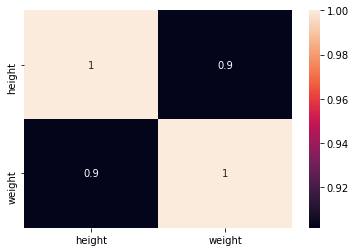

In [31]:
sns.heatmap(corrMatrix, annot=True);

### Pearson's r value

Pearson's $r$ value, or **correlation** value, quantifies the **strength of a relationship**.

$$
r = \frac{\text{cov}(X, Y)}{\sqrt{\text{var}(X)} \sqrt{\text{var}(Y)}} =  \frac{\text{cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

$r = 1$ and $r = -1$ means that the values are **strongly correlated** with a positive or naegative slope. 

$r = 0$ mean that the values are **not correlated** at all.

The correlation value is **scale invariant**.

In [186]:
covMatrix

,height,weight
height,104.652181,76.226474
weight,76.226474,68.293595


In [187]:
r = covMatrix.at['height','weight'] / (df['height'].std() * df['weight'].std())
r

0.9016577106690005

### Linear Regression

Linear regression is a **linear** approach to modelling the relationship between a scalar **dependent variable** (also called feature or target) and one or more explanatory **independent variables**.

The case of one explanatory variable is called **simple linear regression**; for more than one, the process is called **multiple linear regression**. This term is distinct from **multivariate linear regression**, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

The linear regression **model** is described with the coefficients $\theta_0$ (intercept) and $\theta_1$ (slope):

$$
\hat{y} = \theta_0 + \theta_1 x
$$

There are two ways to determine $\theta$, an **analytical** solution and a **numerical** approximation method called gradient descent. The numerical solution is recommended for large datasets.

#### Analytical Solution

Let $X$ signify the **independent data**:

$$
X = \begin{bmatrix}1 & x_1 \\  \vdots & \vdots \\ 1 & x_n \end{bmatrix}
$$

Let $y$ signify **observed values** (the target, aka the thing we’re trying to predict):

$$
y = \begin{pmatrix}y_1 \\ \vdots \\ y_n \end{pmatrix}
$$

then we calculate the coefficiennts $\theta$ with:

$$
\hat{\theta} = \begin{pmatrix}\theta_0, \theta_1 \end{pmatrix} = (X^\top X)^{-1} X^\top y 
$$

In [188]:
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares'''
    return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

X = np.c_[np.ones(df['height'].shape[0]), df['height']]
y = df['weight']

theta = ols(X,y)
print(f'intercept: {theta[0]} | slope: {theta[1]}')

intercept: -38.3366684111279 | slope: 0.7283792191312273


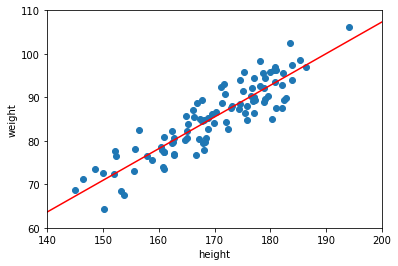

In [189]:
plt.scatter(df['height'], df['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.xlim(140, 200)
plt.ylim(60, 110)
plt.axline((0, theta[0]), slope=theta[1], c='r');

#### Numerical Solution

In [191]:
from sklearn.linear_model import LinearRegression

X = np.array(df['height']).reshape(-1, 1)
y = df['weight']

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

print(f'intercept: {lr.intercept_} | slope: {lr.coef_[0]}')

intercept: -38.33666841113377 | slope: 0.7283792191312637


### R Squared

#### Interpretations of $\text{R}^2$

$\text{R}^2$ tells you how much better a **regression line** predicts the value of a dependent variable than the **mean** of the variable. For example $\text{R} = 0.69$ says that the prediction error is $69 \%$ smaller than when you use the mean.

$\text{R}^2$ is the amount of variance in your dependent variable $y$ that is explained by your independent variable $x$.  For example when predicting grades, $\text{R} = 0.69$ says that $69 \%$ of the variance in the grades can be predicted by the previous grades.

$\text{R}^2$ is easier to interpret as $\text{R}$. For example it is not obvious that $\text{R} = 0.7$ is twice as good as $\text{R} = 0.5$.

In [234]:
r ** 2

0.8129866272088629

$R^2$ can also be calculated and interpretes as:

$$
\text{R}^2 = 1 - \frac{\text{SSE}}{\text{SSE}}
$$

with **Sum of Squared Errors**:

$$
\text{SSE} = \sum_i^n{(y_i - \hat{y_i})^2}
$$

and **Total Sum of Squares**:

$$
\text{SST} = \sum_i^n{(y_i - \overline{y})^2}
$$

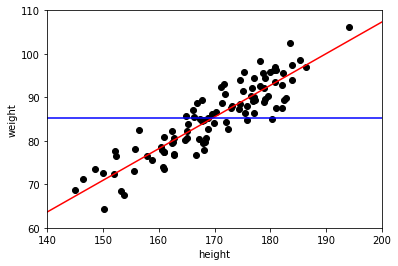

In [235]:
plt.scatter(df['height'], df['weight'], c='k')
plt.xlabel('height')
plt.ylabel('weight')
plt.xlim(140, 200)
plt.ylim(60, 110)
plt.axline((0, theta[0]), slope=theta[1], c='r');
plt.axline((0, df['weight'].mean()), slope=0, c='b');

hence

$$
\begin{align}
\text{R}^2 &= 1 - \, \frac{\text{var}\,(\color{red}{\text{regression}})}{\text{var}\,(\color{blue}{\text{mean}})} \\ \\
&= \frac{\text{var}\,(\color{blue}{\text{mean}}) - \text{var}\,(\color{red}{\text{regression}})}{\text{var}\,(\color{blue}{\text{mean}})}
\end{align}
$$

In [236]:
var_mean = df['weight'].var()
var_regression = np.sum((df['weight'] - lr.predict(df['height'].values.reshape(-1,1)))**2) / (df['weight'].size - 1)

r2 = (var_mean - var_regression) / var_mean
r2

0.8129866272088621

This can be interpreted as: There is **81,3% less variation** around the regression line than around the mean line.

#### Why $\text{R}^2$ is a Poor Metric

$\text{R}^2$ will go up when additional features are added, even if those features provide the model no new predictive power.

### Example

Data is from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

SuicideRate = pd.read_csv("suicide-rates-overview-1985-to-2016.csv")

In [239]:
SuicideRate.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [240]:
pearsoncorr = SuicideRate.corr(method='pearson')
pearsoncorr

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


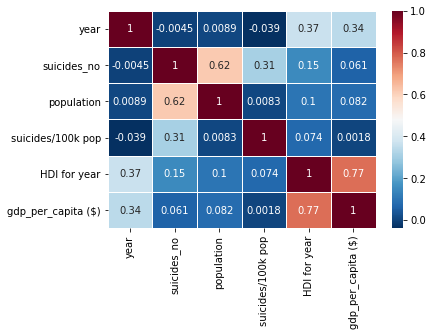

In [242]:
sb.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap='RdBu_r', annot=True, linewidth=0.5);

# TODO

* https://dfrieds.com/math/bessels-correction.html#Bessel's-Correction
* https://www.youtube.com/watch?v=f-6RRsRiPDc
* https://www.youtube.com/watch?v=IaSfvJu5f9I